**NAMA   : MELINDA PURNAMA DEWI  <br>**
**NIM    : 211351082<br>**
**KELAS  : PAGI B**

# Import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"melindapurnamadewi","key":"c330971f0f10970f925a1ec683cc18b1"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d rohan0301/unsupervised-learning-on-country-data --force

  0% 0.00/5.21k [00:00<?, ?B/s]
100% 5.21k/5.21k [00:00<00:00, 10.4MB/s]


In [4]:
!mkdir rohan0301
!unzip unsupervised-learning-on-country-data.zip

Archive:  unsupervised-learning-on-country-data.zip
  inflating: Country-data.csv        
  inflating: data-dictionary.csv     


# Import library yang digunakan

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Data Discovery

In [6]:
df = pd.read_csv('Country-data.csv')

In [7]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
df['country'].value_counts().sum()

167

In [9]:
df = df.drop(['country'], axis=1)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
df.to_csv('Country.csv', index=False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [12]:
X = df

In [13]:
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [14]:
df['gdpp'].sum()

2165014

##EDA ( Minimal 5 )

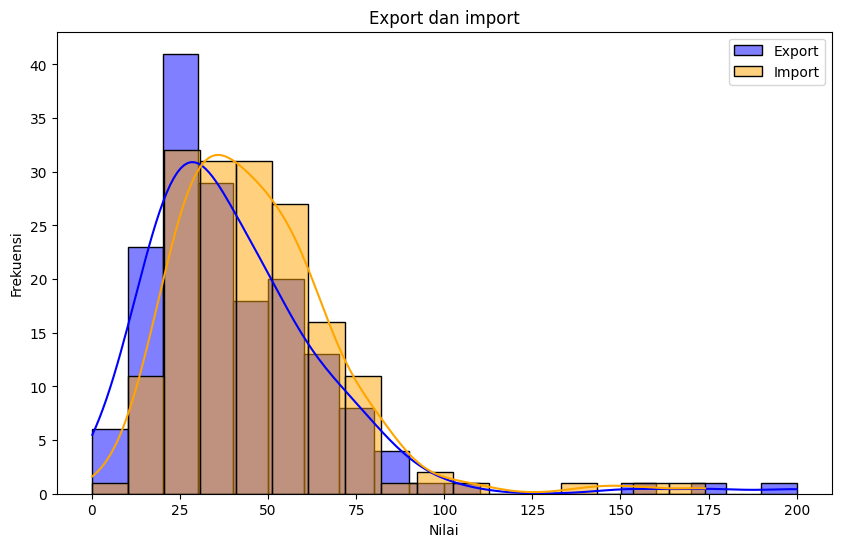

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=X, x=X['exports'], kde=True, color='blue', label='Export')
sns.histplot(data=X, x=X['imports'], kde=True, color='orange', label='Import')
plt.title('Export dan import')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

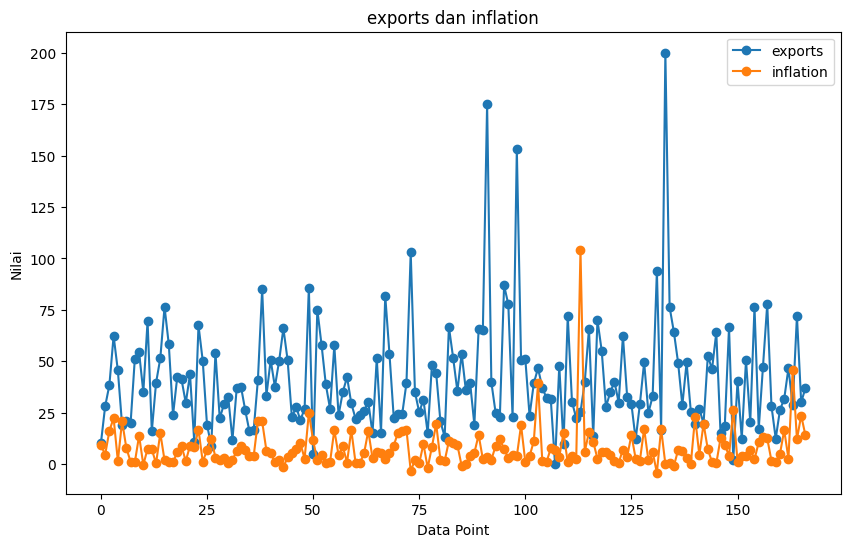

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(X['exports'], label='exports', marker='o', linestyle='-')
plt.plot(X['inflation'], label='inflation', marker='o', linestyle='-')
plt.title('exports dan inflation')
plt.xlabel('Data Point')
plt.ylabel('Nilai')
plt.legend()
plt.show()

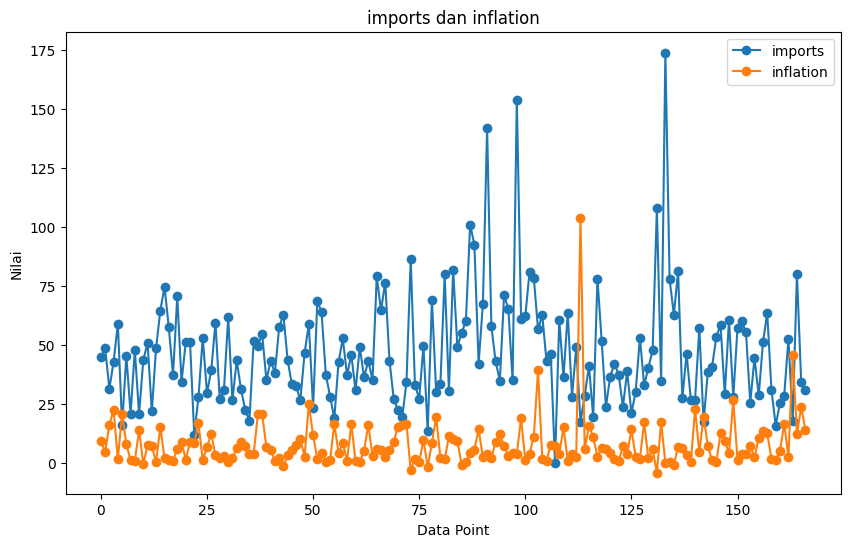

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(X['imports'], label='imports', marker='o', linestyle='-')
plt.plot(X['inflation'], label='inflation', marker='o', linestyle='-')
plt.title('imports dan inflation')
plt.xlabel('Data Point')
plt.ylabel('Nilai')
plt.legend()
plt.show()

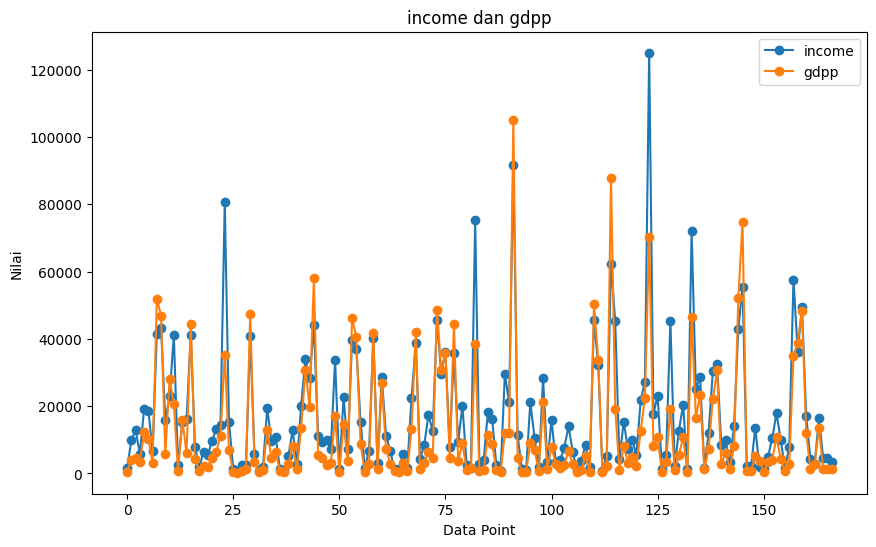

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(X['income'], label='income', marker='o', linestyle='-')
plt.plot(X['gdpp'], label='gdpp', marker='o', linestyle='-')
plt.title('income dan gdpp')
plt.xlabel('Data Point')
plt.ylabel('Nilai')
plt.legend()
plt.show()

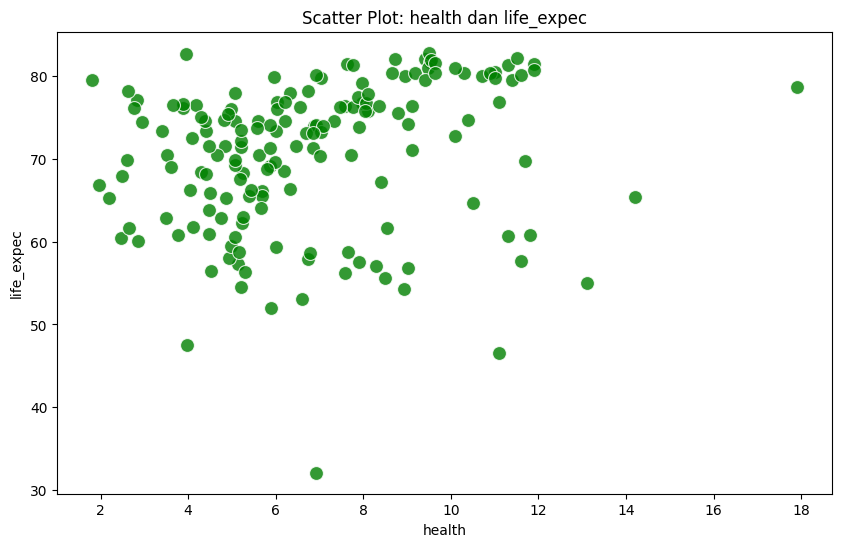

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x=X['health'], y=X['life_expec'], s=100, color='green', alpha=0.8)
plt.title('Scatter Plot: health dan life_expec')
plt.xlabel('health')
plt.ylabel('life_expec')
plt.show()

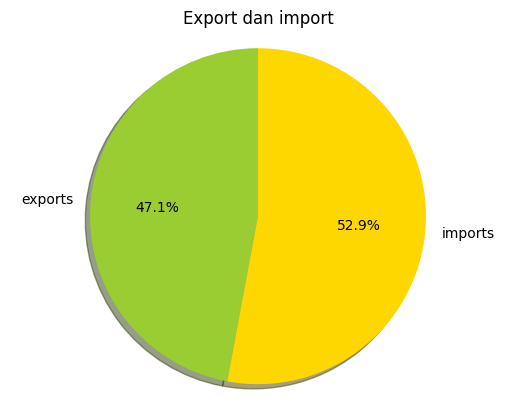

In [20]:
labels = ['exports', 'imports']
quantity = [6965, 7830]
colors = ['yellowgreen', 'gold']

plt.title('Export dan import')
plt.pie(quantity, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

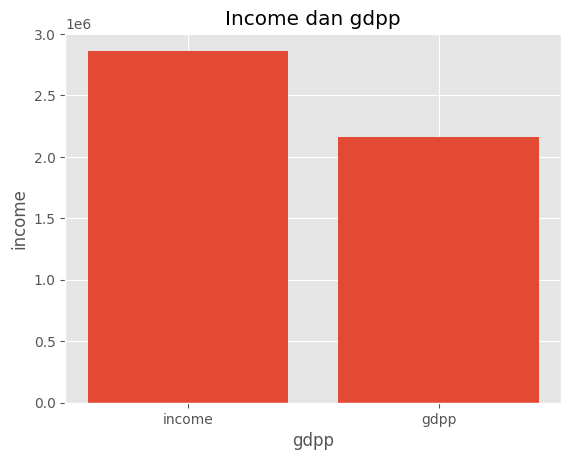

In [21]:
from matplotlib import style

style.use('ggplot')

x = [0, 1]
y = [2863163, 2165014]

fig, ax = plt.subplots()

ax.bar(x, y, align='center')

ax.set_title('Income dan gdpp')
ax.set_ylabel('income')
ax.set_xlabel('gdpp')

ax.set_xticks(x)
ax.set_xticklabels(("income", "gdpp"))

plt.show()

##Prepocessing

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

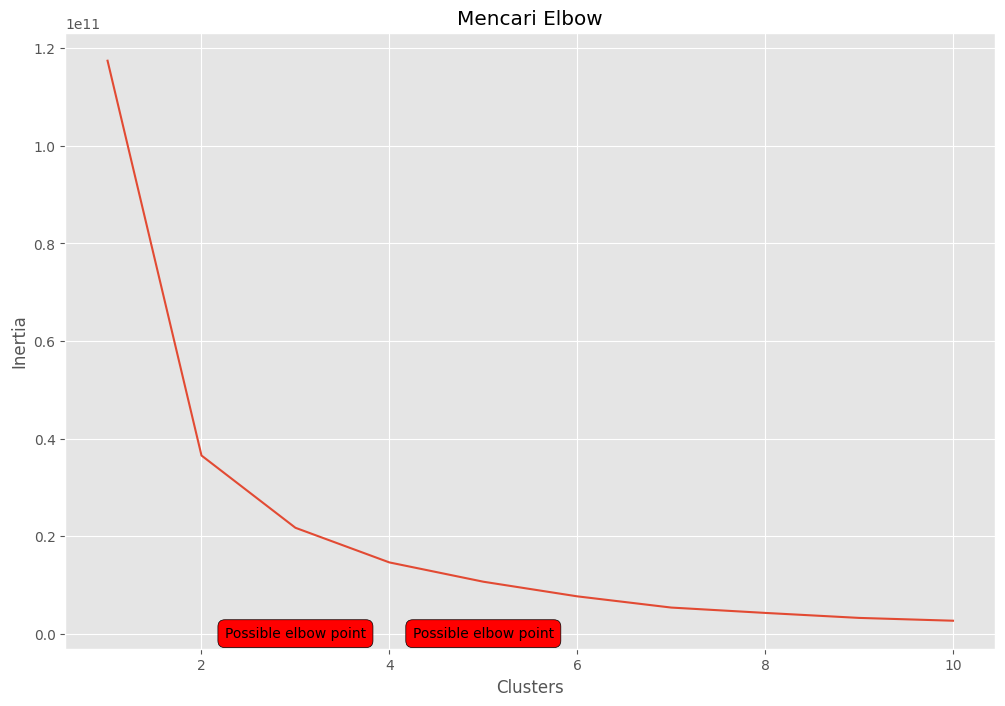

In [22]:
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Mencari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

ax.text(3, 140000, 'Possible elbow point', ha='center', va='center', bbox=dict(facecolor='red', edgecolor='black', boxstyle='round,pad=0.5'))
ax.text(5, 80000, 'Possible elbow point', ha='center', va='center', bbox=dict(facecolor='red', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()

In [23]:
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


##Modeling

In [24]:
n_clust = 5
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


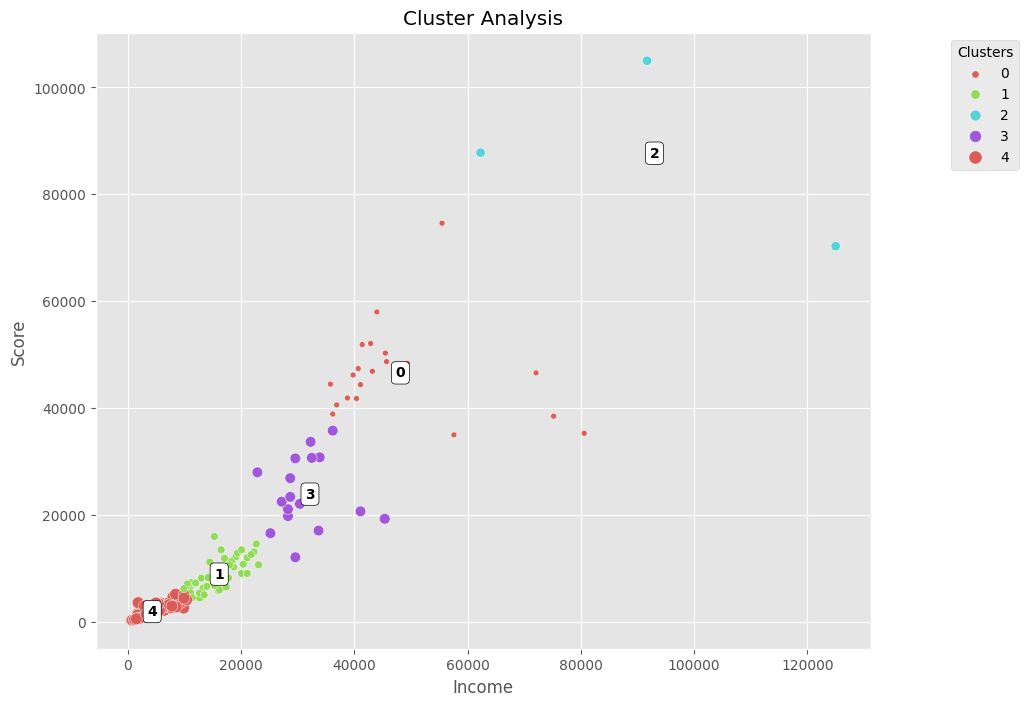

In [25]:
plt.figure(figsize=(10, 8))
scatterplot = sns.scatterplot(x='income', y='gdpp', hue='Labels', size='Labels', data=X, palette='hls', markers=True)
scatterplot.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.2, 1))

for label in X['Labels'].unique():
    cluster_mean = X[X['Labels'] == label][['income', 'gdpp']].mean()
    plt.annotate(label,
                 cluster_mean,
                 ha='center',
                 va='center',
                 color='black',
                 size=10,
                 weight='bold',
                 backgroundcolor='white',
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

plt.title('Cluster Analysis')
plt.xlabel('Income')
plt.ylabel('Score')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

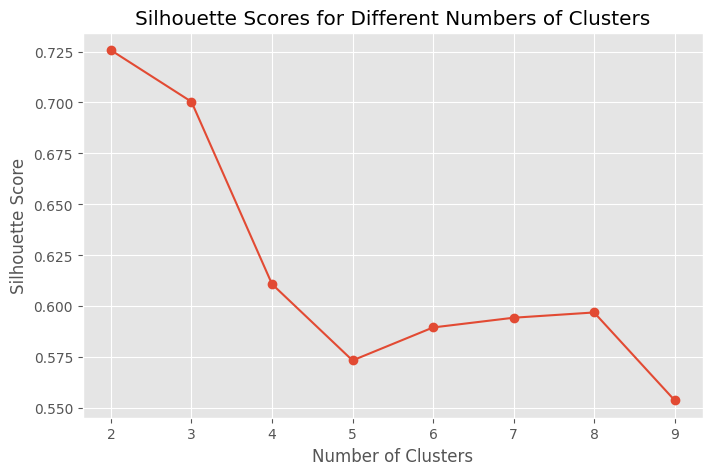

In [26]:
silhouette_scores = []

for num_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=num_clusters)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [27]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette_score is : 0.7256314881616713
For n_clusters = 3, the average silhouette_score is : 0.7003508018720542
For n_clusters = 4, the average silhouette_score is : 0.6109297391282849
For n_clusters = 5, the average silhouette_score is : 0.5734773593685835


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette_score is : 0.5923323962326213


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette_score is : 0.5939250572816521


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the average silhouette_score is : 0.5964827837649684
For n_clusters = 9, the average silhouette_score is : 0.5523907477006085


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##Visualisasi hasil algoritma

In [28]:
kmeans = KMeans(n_clusters=k, n_init=10)  # Set the value of n_init explicitly

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


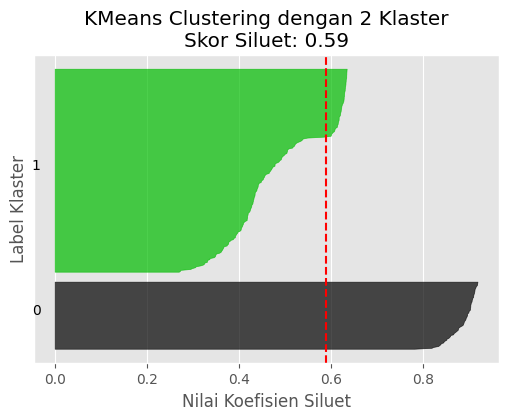

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


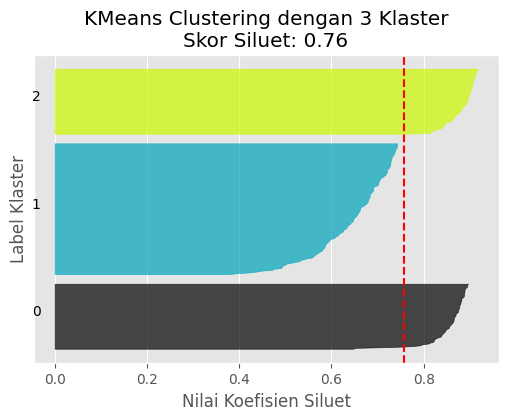

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


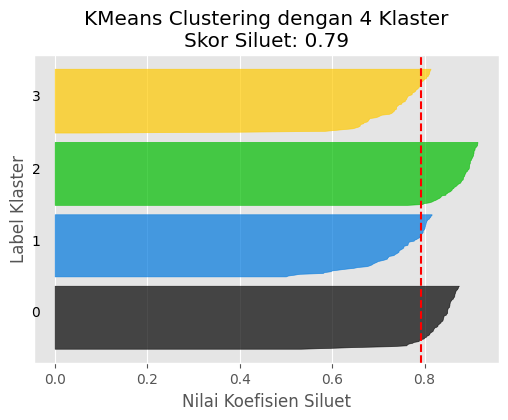

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


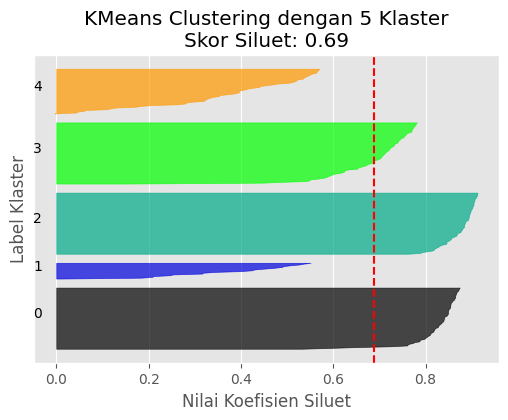

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


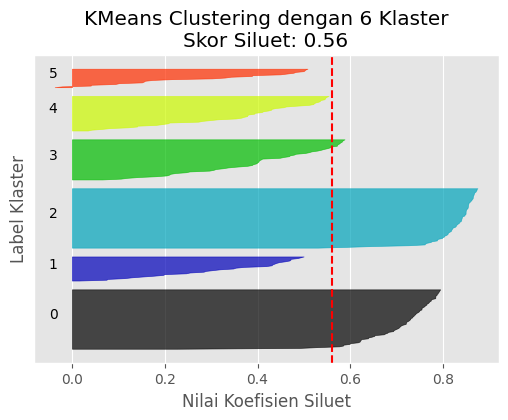

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


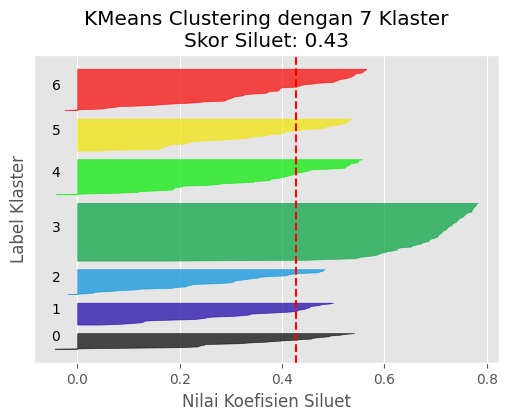

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


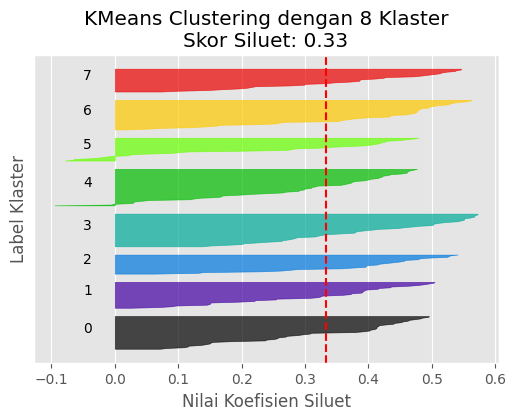

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


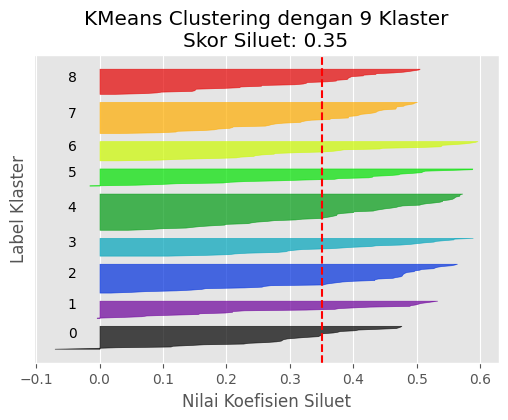

In [29]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Loop melalui berbagai nilai n_clusters
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    sample_silhouette_values = silhouette_samples(X, labels)

    plt.figure(figsize=(6, 4))
    plt.title(f'KMeans Clustering dengan {k} Klaster\nSkor Siluet: {silhouette_avg:.2f}')

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.xlabel("Nilai Koefisien Siluet")
    plt.ylabel("Label Klaster")
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.yticks([])
    plt.show()